# Import Libraries

In [1]:
from numpy.random import seed
seed(2)
from tensorflow import set_random_seed
set_random_seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
print(tf.__version__)

1.13.1


# Load Data

In [2]:
tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

dayData = pd.read_csv("E:/MS/Deep Learning/Assignments/Assignment1/Bike-Sharing-Dataset/day.csv")
dayData = dayData.reindex( np.random.permutation(dayData.index))
dayData

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
671,672,2012-11-02,4,1,11,0,5,1,1,0.4,0.4,0.5,0.3,618,5229,5847
199,200,2011-07-19,3,0,7,0,2,1,1,0.8,0.7,0.7,0.1,752,3789,4541
77,78,2011-03-19,1,0,3,0,6,0,1,0.5,0.5,0.4,0.4,1424,1693,3117
225,226,2011-08-14,3,0,8,0,0,0,2,0.7,0.6,0.8,0.2,1338,2482,3820
37,38,2011-02-07,1,0,2,0,1,1,1,0.3,0.3,0.7,0.0,120,1592,1712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,535,2012-06-18,2,1,6,0,1,1,2,0.6,0.5,0.8,0.2,653,4446,5099
584,585,2012-08-07,3,1,8,0,2,1,2,0.7,0.7,0.7,0.1,1278,5995,7273
493,494,2012-05-08,2,1,5,0,2,1,2,0.6,0.6,0.7,0.3,738,4990,5728
527,528,2012-06-11,2,1,6,0,1,1,2,0.7,0.7,0.6,0.2,1017,5647,6664


In [114]:
dayData.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
671,672,2012-11-02,4,1,11,0,5,1,1,0.4,0.4,0.5,0.3,618,5229,5847
199,200,2011-07-19,3,0,7,0,2,1,1,0.8,0.7,0.7,0.1,752,3789,4541
77,78,2011-03-19,1,0,3,0,6,0,1,0.5,0.5,0.4,0.4,1424,1693,3117
225,226,2011-08-14,3,0,8,0,0,0,2,0.7,0.6,0.8,0.2,1338,2482,3820
37,38,2011-02-07,1,0,2,0,1,1,1,0.3,0.3,0.7,0.0,120,1592,1712


In [3]:
dayData.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0
mean,366.0,2.5,0.5,6.5,0.0,3.0,0.7,1.4,0.5,0.5,0.6,0.2,848.2,3656.2,4504.3
std,211.2,1.1,0.5,3.5,0.2,2.0,0.5,0.5,0.2,0.2,0.1,0.1,686.6,1560.3,1937.2
min,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.1,0.1,0.0,0.0,2.0,20.0,22.0
25%,183.5,2.0,0.0,4.0,0.0,1.0,0.0,1.0,0.3,0.3,0.5,0.1,315.5,2497.0,3152.0
50%,366.0,3.0,1.0,7.0,0.0,3.0,1.0,1.0,0.5,0.5,0.6,0.2,713.0,3662.0,4548.0
75%,548.5,3.0,1.0,10.0,0.0,5.0,1.0,2.0,0.7,0.6,0.7,0.2,1096.0,4776.5,5956.0
max,731.0,4.0,1.0,12.0,1.0,6.0,1.0,3.0,0.9,0.8,1.0,0.5,3410.0,6946.0,8714.0


# Lets check the categorical variables now. using pd.get_dummies()

In [4]:
def generate_dummies(df, dummy_column):
    dummies = pd.get_dummies(df[dummy_column], prefix=dummy_column)
    df = pd.concat([df, dummies], axis=1)
    return df

BikeDayDF = pd.DataFrame.copy(dayData)
dummy_columns = ["season",     # season (1:springer, 2:summer, 3:fall, 4:winter)
                 "yr",          # year (0: 2011, 1:2012)
                 "mnth",        # month ( 1 to 12)
                 "weekday",     # weekday : day of the week
                 "weathersit"   # weathersit : 
                                 # - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                                 # - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                                 # - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                                 # - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
                ]
for dummy_column in dummy_columns:
    BikeDayDF = generate_dummies(BikeDayDF, dummy_column)

In [5]:
BikeDayDF.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'season_1', 'season_2', 'season_3',
       'season_4', 'yr_0', 'yr_1', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_1', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [6]:
#deleting the columns those are one hot encocded
for dummy_column in dummy_columns:
    del BikeDayDF[dummy_column]

BikeDayDF.columns

Index(['instant', 'dteday', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'season_1', 'season_2',
       'season_3', 'season_4', 'yr_0', 'yr_1', 'mnth_1', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_1',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [7]:
BikeDayDF.head()

,instant,dteday,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
671,672,2012-11-02,0,1,0.4,0.4,0.5,0.3,618,5229,...,0,0,0,0,0,1,0,1,0,0
199,200,2011-07-19,0,1,0.8,0.7,0.7,0.1,752,3789,...,0,0,1,0,0,0,0,1,0,0
77,78,2011-03-19,0,0,0.5,0.5,0.4,0.4,1424,1693,...,0,0,0,0,0,0,1,1,0,0
225,226,2011-08-14,0,0,0.7,0.6,0.8,0.2,1338,2482,...,1,0,0,0,0,0,0,0,1,0
37,38,2011-02-07,0,1,0.3,0.3,0.7,0.0,120,1592,...,0,1,0,0,0,0,0,1,0,0


In [8]:
BikeDayDF=BikeDayDF.drop(['instant','dteday','casual', 'registered'], axis=1)

In [9]:
BikeDayDF.shape

(731, 35)

# Preprocess Data

In [10]:
def preprocess_features(BikeDayDF):
  """Prepares input features from concrete slump test data set.

  Args:
    concrete_dataframe: A Pandas DataFrame expected to contain data
      from the concrete slump test dataset.
  Returns:
    A DataFrame that contains the features to be used for the model. 
  """
  selected_features = BikeDayDF[
    [ "holiday", "workingday", "temp", "atemp", "hum",
       "windspeed", "season_1", "season_2",
       "season_3", "season_4", "yr_0", "yr_1", "mnth_1", "mnth_2", "mnth_3",
       "mnth_4", "mnth_5", "mnth_6", "mnth_7", "mnth_8", "mnth_9", "mnth_10",
       "mnth_11", "mnth_12", "weekday_0", "weekday_1", "weekday_2",
       "weekday_3", "weekday_4", "weekday_5", "weekday_6", "weathersit_1",
       "weathersit_2", "weathersit_3"]]
    
  processed_features = selected_features.copy()
  
  return processed_features

def preprocess_targets(BikeDayDF):
  """Prepares target features (i.e., labels) from  housing data set.

  Args:
    dataframe: A Pandas DataFrame expected to contain data
      from the data set.
  Returns:
    A DataFrame that contains the target feature.
  """
  output_targets = BikeDayDF["cnt"]
  return output_targets

In [11]:
BikeDayDF.head(5)

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
671,0,1,0.4,0.4,0.5,0.3,5847,0,0,0,...,0,0,0,0,0,1,0,1,0,0
199,0,1,0.8,0.7,0.7,0.1,4541,0,0,1,...,0,0,1,0,0,0,0,1,0,0
77,0,0,0.5,0.5,0.4,0.4,3117,1,0,0,...,0,0,0,0,0,0,1,1,0,0
225,0,0,0.7,0.6,0.8,0.2,3820,0,0,1,...,1,0,0,0,0,0,0,0,1,0
37,0,1,0.3,0.3,0.7,0.0,1712,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
# from sklearn import preprocessing
# # Get column names first
# names = BikeDayDF.columns
# # Create the Scaler object
# scaler = preprocessing.StandardScaler()
# # Fit your data on the scaler object
# scaled_df = scaler.fit_transform(BikeDayDF)
# BikeDayDF = pd.DataFrame(scaled_df, columns=names)

In [12]:
BikeDayDF.tail(5)

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
534,0,1,0.6,0.5,0.8,0.2,5099,0,1,0,...,0,1,0,0,0,0,0,0,1,0
584,0,1,0.7,0.7,0.7,0.1,7273,0,0,1,...,0,0,1,0,0,0,0,0,1,0
493,0,1,0.6,0.6,0.7,0.3,5728,0,1,0,...,0,0,1,0,0,0,0,0,1,0
527,0,1,0.7,0.7,0.6,0.2,6664,0,1,0,...,0,1,0,0,0,0,0,0,1,0
168,0,0,0.7,0.6,0.7,0.1,5119,0,1,0,...,0,0,0,0,0,0,1,1,0,0


In [13]:
# Choose the first 584 examples for training.
training_examples = preprocess_features(BikeDayDF.head(500))
training_targets = preprocess_targets(BikeDayDF.head(500))


# Choose the 147 examples for validation.
validation_examples = preprocess_features(BikeDayDF.tail(231))
validation_targets = preprocess_targets(BikeDayDF.tail(231))

# Double-check that we've done the right thing.
print("Training examples summary:")
display.display(training_examples.describe())
print("Validation examples summary:")
display.display(validation_examples.describe())

print("Training targets summary:")
display.display(training_targets.describe())
print("Validation targets summary:")
display.display(validation_targets.describe())

Training examples summary:


,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
count,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0
mean,0.0,0.7,0.5,0.5,0.6,0.2,0.2,0.3,0.3,0.2,...,0.1,0.1,0.2,0.2,0.1,0.2,0.1,0.6,0.3,0.0
std,0.1,0.5,0.2,0.2,0.1,0.1,0.4,0.4,0.4,0.4,...,0.4,0.3,0.4,0.4,0.3,0.4,0.3,0.5,0.5,0.1
min,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.3,0.4,0.5,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,1.0,0.5,0.5,0.6,0.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
75%,0.0,1.0,0.7,0.6,0.7,0.2,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
max,1.0,1.0,0.9,0.8,1.0,0.4,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Validation examples summary:


,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
count,231.0,231.0,231.0,231.0,231.0,231.0,231.0,231.0,231.0,231.0,...,231.0,231.0,231.0,231.0,231.0,231.0,231.0,231.0,231.0,231.0
mean,0.1,0.6,0.5,0.5,0.6,0.2,0.3,0.3,0.3,0.2,...,0.1,0.2,0.1,0.1,0.2,0.1,0.2,0.6,0.3,0.0
std,0.2,0.5,0.2,0.2,0.1,0.1,0.4,0.4,0.4,0.4,...,0.3,0.4,0.3,0.3,0.4,0.3,0.4,0.5,0.5,0.2
min,0.0,0.0,0.1,0.1,0.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.3,0.3,0.5,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,1.0,0.4,0.4,0.6,0.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
75%,0.0,1.0,0.7,0.6,0.7,0.2,1.0,0.5,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
max,1.0,1.0,0.8,0.8,1.0,0.5,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Training targets summary:


count    500.0
mean    4594.5
std     1872.0
min       22.0
25%     3351.0
50%     4585.5
75%     5919.2
max     8714.0
Name: cnt, dtype: float64

Validation targets summary:


count    231.0
mean    4309.2
std     2062.1
min      431.0
25%     2428.0
50%     4390.0
75%     5989.0
max     8227.0
Name: cnt, dtype: float64

In [14]:
print(training_examples.shape)

(500, 34)


##### Base line metric is standing with MAE as std 2062 , we need to build a model which performs better than this value

# Build Model 

# With 2 hidden layer and learning rate as 0.001

In [20]:
import random 
tf.set_random_seed(42) 
model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
     keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
   keras.layers.Dense(1)
  ])

optimizer = tf.train.RMSPropOptimizer(0.001)

model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                2240      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 6,465
Trainable params: 6,465
Non-trainable params: 0
_________________________________________________________________


In [21]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

# Store training stats
historyL1 = model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [22]:
print(min(historyL1.history['val_mean_absolute_error']))

546.49475


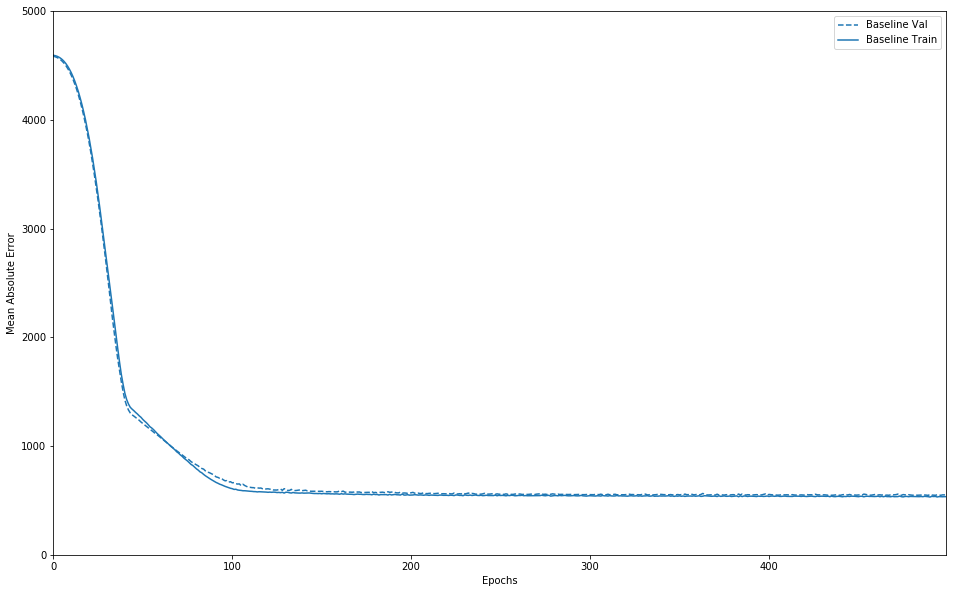

In [29]:
import matplotlib.pyplot as plt


def plot_history(histories, key='mean_absolute_error'):
    plt.figure(figsize=(16,10))
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
               '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
         label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])
    plt.ylim([0,5000])

plot_history([('baseline', historyL1)])

# With 1 hidden layer and with 2/ 3 the size of the Input layer, plus the size of the Output layer

In [45]:
import random 
tf.set_random_seed(42) 
model = keras.Sequential([
    keras.layers.Dense(23, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    
    keras.layers.Dense(1)
  ])

optimizer = tf.train.RMSPropOptimizer(0.001)

model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 23)                805       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 24        
Total params: 829
Trainable params: 829
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Store training stats

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500
tf.set_random_seed(1)

# Store training stats
history2L = model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [48]:
print(min(history2L.history['val_mean_absolute_error']))

652.2936


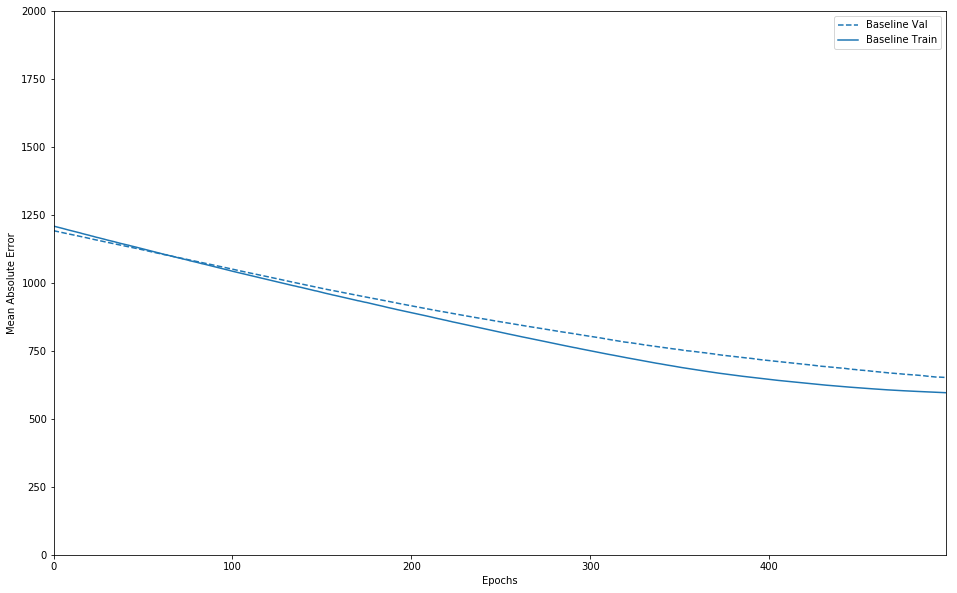

In [53]:
import matplotlib.pyplot as plt


def plot_history(histories, key='mean_absolute_error'):
    plt.figure(figsize=(16,10))
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
               '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
         label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])
    plt.ylim([0,2000])

plot_history([('baseline', history2L)])

# adding batch size as 2,4,8

In [54]:
# Store training stats

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 50
tf.set_random_seed(1)

# Store training stats
historyBS2 = model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_split=0.2, verbose=0, batch_size = 2,
                    callbacks=[PrintDot()])
historyBS4 = model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_split=0.2, verbose=0, batch_size = 4,
                    callbacks=[PrintDot()])
historyBS8 = model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_split=0.2, verbose=0, batch_size = 8,
                    callbacks=[PrintDot()])


..................................................
..................................................
..................................................

In [55]:
print(min(historyBS2.history['val_mean_absolute_error']))

603.88464


In [56]:
print(min(historyBS4.history['val_mean_absolute_error']))

593.97955


In [57]:
print(min(historyBS8.history['val_mean_absolute_error']))

589.23724


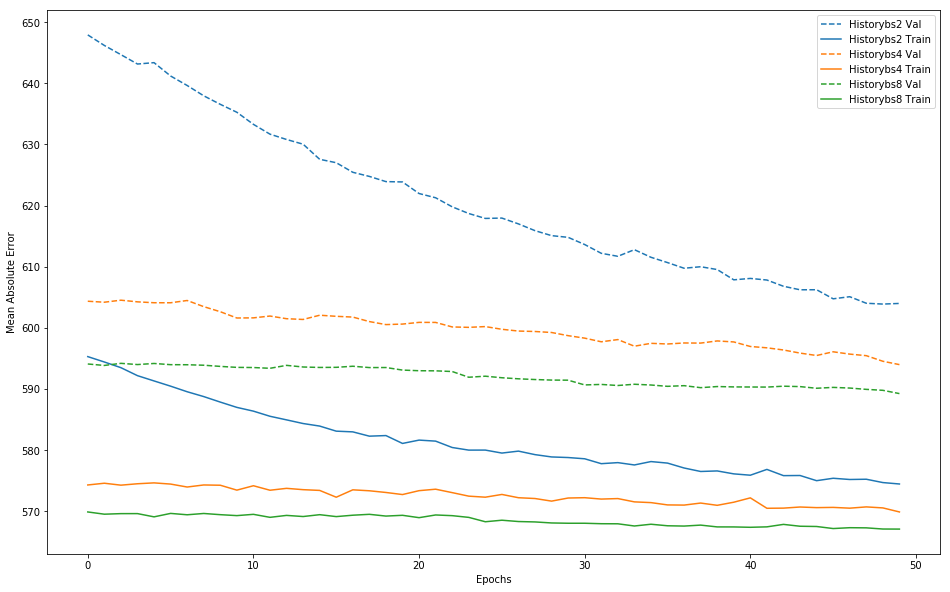

In [71]:
import matplotlib.pyplot as plt


def plot_history(histories, key='mean_absolute_error'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  #plt.xlim([0,max(history.epoch)])
 # plt.ylim([0,900])

#plot_history([('baseline', b_history)])
# Plot history Multiple
plot_history([('historyBS2', historyBS2),
              ('historyBS4', historyBS4),
              ('historyBS8', historyBS8)])

Insights: With Batch size = 8, keeping every parameter constant we have seen similar results for the validation loss where it fluctuates more with the no. of EPOCHS. We have seen pattern where once we increase the Batch Size, fluctuation increases in the Validation Loss as model is not stable.

The best model fit with parameter batch size 2 has worked very well compared to 4 & 8.

# L1,L2 Norms & DropOut to reduce the Generalisaton Error

In [72]:
baseline_model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),

    keras.layers.Dense(1)
  ])

optimizer = tf.train.RMSPropOptimizer(0.001)
#optimizer = tf.train.AdamOptimizer()

baseline_model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])

l1_model = keras.Sequential([
    keras.layers.Dense(64, kernel_regularizer=keras.regularizers.l1(0.1), activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(64, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    keras.layers.Dense(64, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    keras.layers.Dense(64, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

l1_model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])

l2_model = keras.Sequential([
    keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

l2_model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])

In [73]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500
tf.set_random_seed(1)

# Store training stats
b_history = baseline_model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[PrintDot()])
l1_history = l1_model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[PrintDot()])
bl2_history = l2_model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[PrintDot()])



....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [75]:
print(min(b_history.history['val_mean_absolute_error']))
print(min(l1_history.history['val_mean_absolute_error']))
print(min(bl2_history.history['val_mean_absolute_error']))

570.69714
564.73584
656.1771


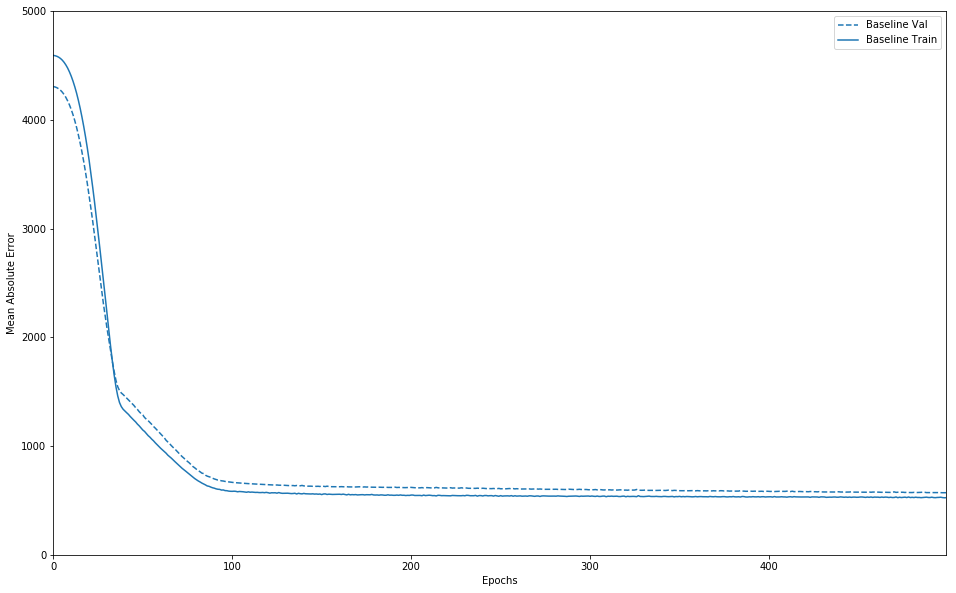

In [110]:
import matplotlib.pyplot as plt


def plot_history(histories, key='mean_absolute_error'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([0,5000])

# Plot history Multiple
plot_history([('baseline', b_history)])
#               ('L1', l1_history),
#               ('L2', bl2_history)])

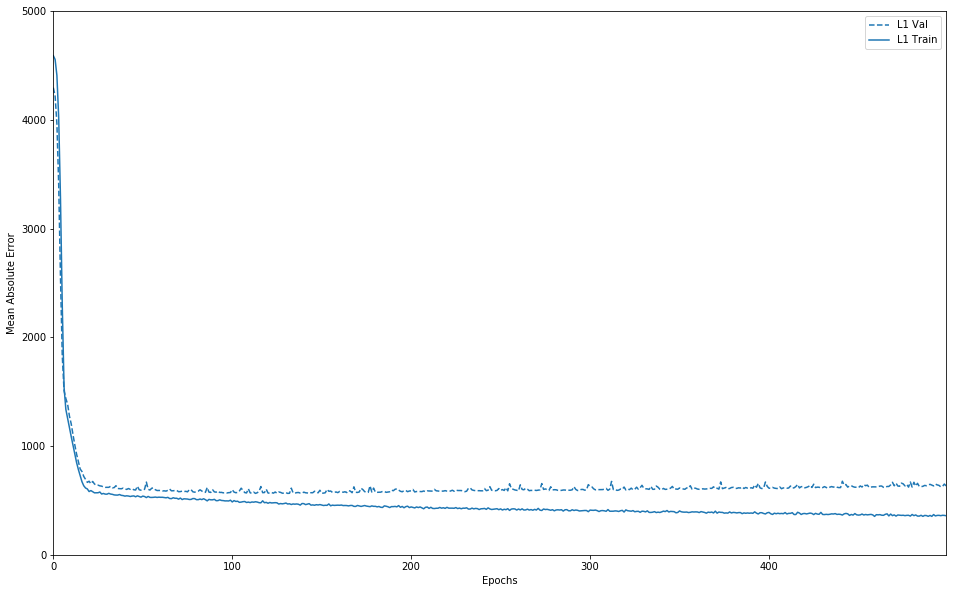

In [111]:
plot_history([('l1', l1_history)])

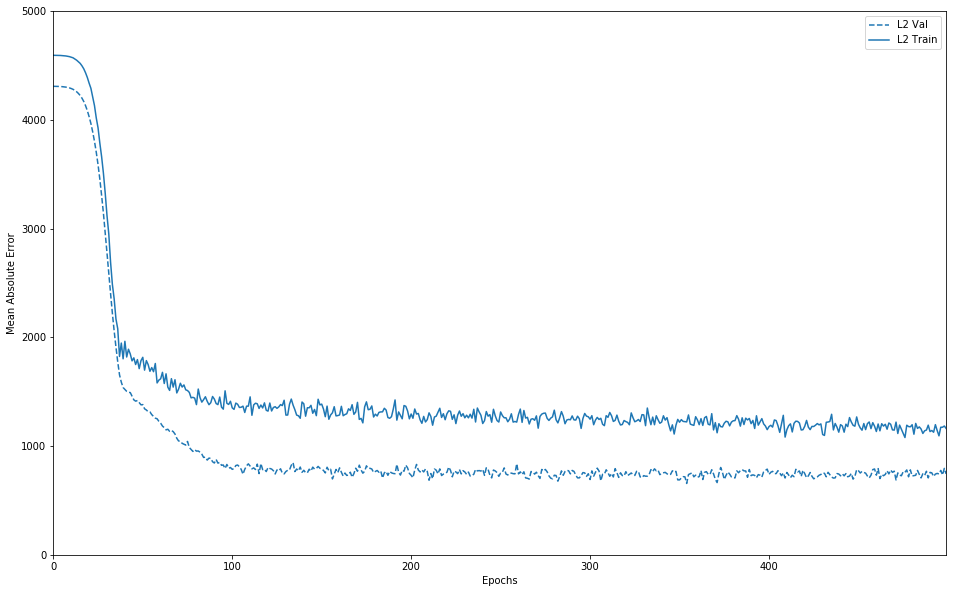

In [113]:
plot_history([('l2', bl2_history)])

In [ ]:
valpreds = baseline_model.predict_on_batch(validation_examples)
print(valpreds)

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(validation_targets)

In [ ]:
nfw = baseline_model.get_weights()[0][0]
y_

##### We achieved the better performance of MSE of 546 (2 hidden layers and learning rate 0.001) compared to baseline std deviation of 2062.1